In [30]:
# Research Question: What other aspects of wellness predict whether one uses physical activity as a coping mechanism?

# Survey was given to first-year incoming freshmen students at Truman State University. In this research, I attempt to answer the above question. 

In [31]:
# Imports 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_absolute_error, 
                            mean_squared_error, 
                            r2_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [32]:
# Load data

data = pd.read_csv("PreTest_ReadyForRStudio.csv")
#data.describe()

In [33]:
# Basic data observations honed in on the Physical_Activity_Scress variable. This is an essential variable for this research.
# Note: The Physical_Activity_Stress variable was an answer to the following question on a scale from 1-4: 
# I use physical activity as a coping mechanism to help deal with stress

data["Physical_Activity_Stress"].describe()

count    1074.000000
mean        2.675047
std         1.010472
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: Physical_Activity_Stress, dtype: float64

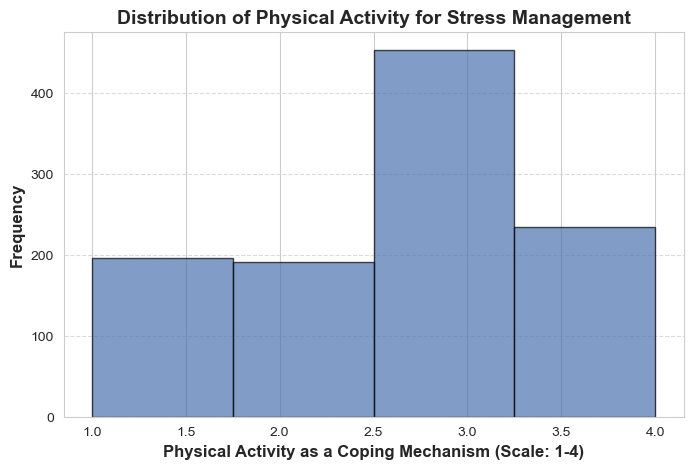

In [34]:
# Basic histogram of the Physical_Activity_Stress variable

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
plt.hist(data["Physical_Activity_Stress"], bins=4, color="#4C72B0", edgecolor="black", alpha=0.7)
plt.xlabel('Physical Activity as a Coping Mechanism (Scale: 1-4)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Physical Activity for Stress Management', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

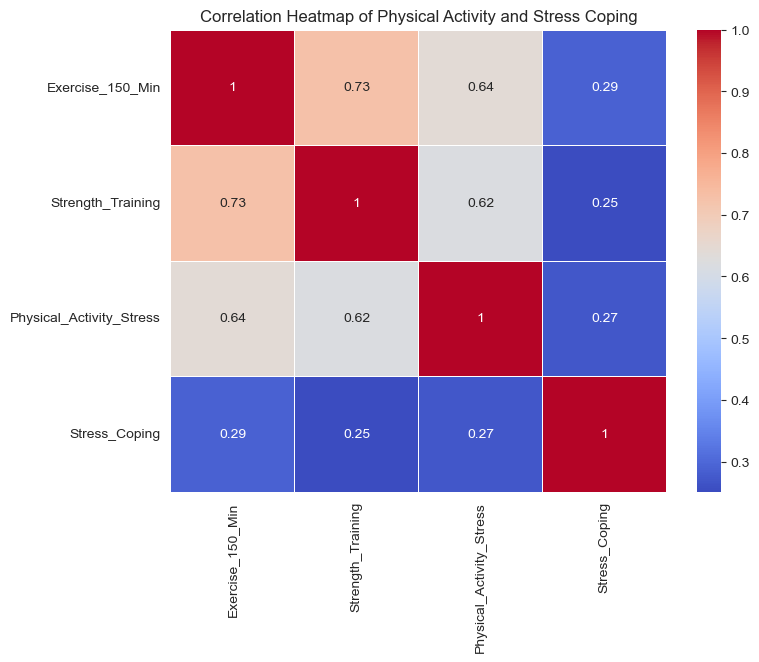

In [35]:
# Correlation heatmap of physical-related variables and Stress_Coping

corr = data[['Exercise_150_Min', 'Strength_Training', 'Physical_Activity_Stress', 'Stress_Coping']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap of Physical Activity and Stress Coping")
plt.show()

# Physical_Activity_Stress, Exercise_150_Min, and Strength_Training are positively correlated (≥0.6), which is expected since these variables all relate to physical activity.
# Stress_Coping has a slightly positive correlation (~0.27-0.29) with physical activity variables, indicating that students who engage in more physical activity tend to feel more confident in coping with stress.
# Study_Skills has a slight correlation (~0.23-0.28) with physical activity, but it still suggests a potential positive effect of exercise on academic confidence.

In [36]:
# ---- INITIAL MULTIPLE LINEAR REGRESSION: PREDICTING PHYSICAL ACTIVITY AS A COPING MECHANISM ----
# Note: these are variables I assumed to be important. Output --> R^2 of 0.477. p-values are iffy.
# [FOR PHYSICAL_ACTIVITY_STRESS]

predictors = ["Exercise_150_Min", "Strength_Training", "Stress_Coping", "Feelings", 
              "7_Hours_Sleep", "Controlled_Life", "Parent_Financial_Support",
              "Strong_Social_Network", "Balanced_Diet", "Close_Relationships", 
              "Understand_Purpose"]

X = data[predictors].fillna(data[predictors].mean())
y = data["Physical_Activity_Stress"].fillna(data["Physical_Activity_Stress"].mean())

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Physical_Activity_Stress   R-squared:                       0.477
Model:                                  OLS   Adj. R-squared:                  0.471
Method:                       Least Squares   F-statistic:                     87.97
Date:                      Thu, 03 Apr 2025   Prob (F-statistic):          5.10e-141
Time:                              23:24:31   Log-Likelihood:                -1187.7
No. Observations:                      1075   AIC:                             2399.
Df Residuals:                          1063   BIC:                             2459.
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [37]:
# ---- MULTIPLE LINEAR REGRESSION: PREDICTING PHYSICAL ACTIVITY AS A COPING MECHANISM ----
# Note: This is AFTER running stepwise regression in R.
# p-values are significant and R^2 is approximately 0.5
# [FOR PHYSICAL_ACTIVITY_STRESS]

final_predictors = [
    'Club_Sports', 'Social_Sorority/Fraternity', 'Exercise_150_Min',
    'Strength_Training', 'Healthy_Meal_Choices', 'Avoid_Alcohol',
    'Regular_Medical_Visits', 'Manage_Conflict', 'Feelings', 'Body_Image',
    'Learn_New_Things', 'Challenges_Growth', 'Current_Events',
    'Personal_Values', 'Spirituality_Hardship', 'Track_Spending',
    'Financial_Anxiety', 'Future_Financial_Plan', 'Contribution',
    'Family_Grad_History', 'Controlled_Life', 'Openness', 'Budget'
]

clean_data = (data[final_predictors + ['Physical_Activity_Stress']]
              .replace([np.inf, -np.inf], np.nan)
              .dropna()
              .copy())


X_final = clean_data[final_predictors]
y_final = clean_data["Physical_Activity_Stress"]

final_model = sm.OLS(y_final, sm.add_constant(X_final)).fit()
print(final_model.summary())

# Analysis and interpretation:
# - Exercise and strength training remain strong positive predictors of using physical activity to cope with stress.
# - Involvement in club sports and social organizations (like sororities/fraternities) also seems to be beneficial.
# - The added predictors from R, like "Controlled_Life", "Openness", and "Budget", may provide additional insights into personal and financial factors affecting physical activity as a coping mechanism.

                               OLS Regression Results                               
Dep. Variable:     Physical_Activity_Stress   R-squared:                       0.512
Model:                                  OLS   Adj. R-squared:                  0.502
Method:                       Least Squares   F-statistic:                     47.24
Date:                      Thu, 03 Apr 2025   Prob (F-statistic):          1.45e-143
Time:                              23:24:31   Log-Likelihood:                -1131.8
No. Observations:                      1058   AIC:                             2312.
Df Residuals:                          1034   BIC:                             2431.
Df Model:                                23                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

C:\Users\wolzi\AppData\Local\Temp\ipykernel_27644\2659482742.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_positive.values, y=top_10_positive.index,


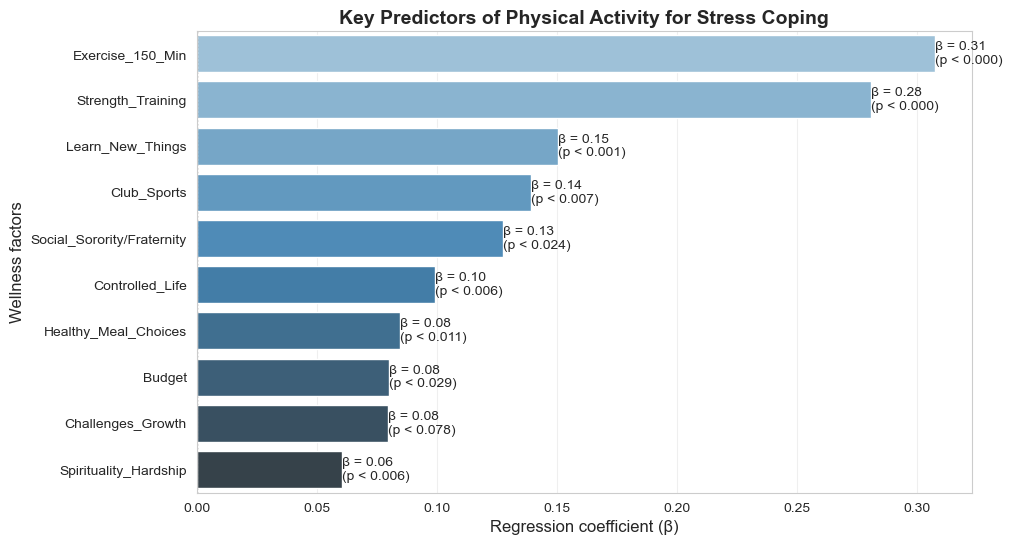

In [125]:
# --- VISUALIZATION FOR STEPWISE MODEL ---

positive_coefs = final_model.params[1:][final_model.params[1:] > 0]
top_10_positive = positive_coefs.sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_positive.values, y=top_10_positive.index, 
                 palette="Blues_d", saturation=0.8)
plt.title("Key Predictors of Physical Activity for Stress Coping", 
          fontsize=14, pad=5, fontweight='semibold')
plt.xlabel("Regression coefficient (β)", fontsize=12)
plt.ylabel("Wellness factors", fontsize=12)
plt.axvline(0, color='gray', linestyle=':', linewidth=1)
plt.grid(axis='x', alpha=0.3)

# Value annotations
for i, (coef, pred) in enumerate(zip(top_10_positive.values, top_10_positive.index)):
    ax.text(coef, i, f"β = {coef:.2f}\n(p < {final_model.pvalues[pred]:.3f})", 
            ha='left' if coef > 0 else 'right', 
            va='center',
            fontsize=10,
            linespacing=1.2)

# Model identifies Exercise_150_Min and Strength_Training to be the strongest predictors of using physical activity for stress management/coping
# Also identifies variables like Learn_New_Things and engaging in a fraternity or sorority, or club sports play a "secondary" role.
# Less engagement in current events may result in relying more on physical activity for stress.

In [101]:
# Random Forest Model Summary

print("\n" + "="*60)
print("RANDOM FOREST REGRESSION SUMMARY".center(60))
print("="*60)

# 1. Basic Model Info
print(f"\n{'Model Configuration:':<25}")
print(f"- Estimators: {rf_reg.n_estimators}")
print(f"- OOB Score: {rf_reg.oob_score_:.3f}")
print(f"- Random State: {rf_reg.random_state}")

# 2. Performance Metrics
print(f"\n{'Out-of-Bag Performance:':<25}")
print(f"- MAE: {mean_absolute_error(y, oob_pred):.3f}")
print(f"- RMSE: {np.sqrt(mean_squared_error(y, oob_pred)):.3f}")
print(f"- R²: {r2_score(y, oob_pred):.3f}")

# 3. Practical Interpretation
print(f"\n{'Practical Interpretation:':<25}")
print(f"- For a true value of 2, predictions typically fall between {2 - mean_absolute_error(y, oob_pred):.2f} and {2 + mean_absolute_error(y, oob_pred):.2f}")
print(f"- Model explains {r2_score(y, oob_pred)*100:.1f}% of variance in physical activity coping")

# 4. Top Features
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n{'Top 5 Predictors:':<25}")
for i, row in importance.head(5).iterrows():
    print(f"- {row['Feature']}: {row['Importance']:.3f}")

# 5. Comparison to Categorical Treatment
print(f"\n{'Categorical Treatment:':<25}")
print("- OOB Error: 0.193")
print("- Log Loss: 2.127 (suggests model uncertainty)")
print("- Recommended: Regression treatment performs better for this ordinal outcome")

print("\n" + "="*60)


              RANDOM FOREST REGRESSION SUMMARY              

Model Configuration:     
- Estimators: 500
- OOB Score: 0.393
- Random State: 42

Out-of-Bag Performance:  
- MAE: 0.629
- RMSE: 0.787
- R²: 0.393

Practical Interpretation:
- For a true value of 2, predictions typically fall between 1.37 and 2.63
- Model explains 39.3% of variance in physical activity coping

Top 5 Predictors:        
- Strength_Training: 0.331
- Exercise_150_Min: 0.169
- Understand_Purpose: 0.071
- Balanced_Diet: 0.068
- 7_Hours_Sleep: 0.066

Categorical Treatment:   
- OOB Error: 0.193
- Log Loss: 2.127 (suggests model uncertainty)
- Recommended: Regression treatment performs better for this ordinal outcome



C:\Users\wolzi\AppData\Local\Temp\ipykernel_27644\1596683334.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Odds_Ratio', y='Predictor', data=results_df,


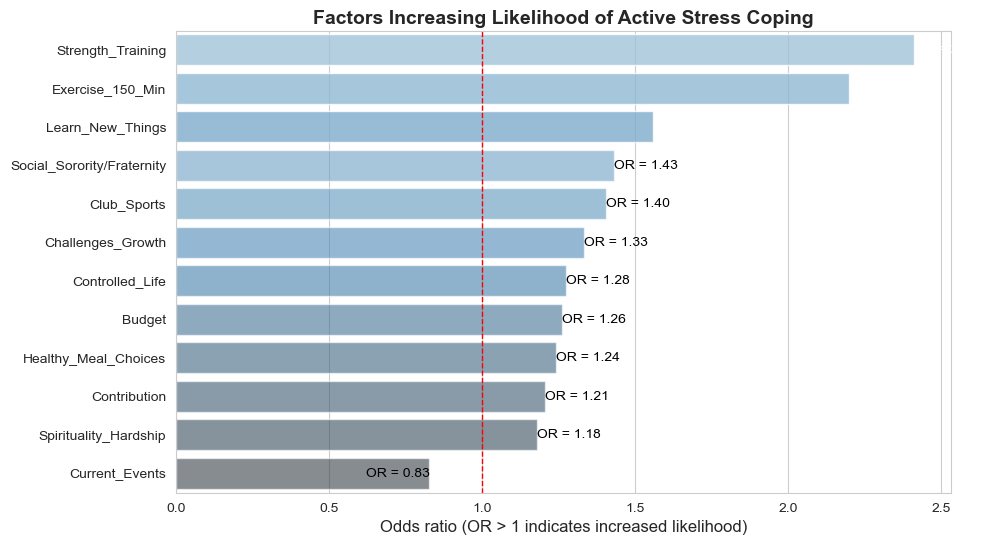

In [123]:
# --- ORDINAL LOGISTIC REGRESSION VISUALIZATION ---
# Extract significant predictors (p < 0.05)

significant = ordinal_result.pvalues[ordinal_result.pvalues < 0.05].index[:-3]
odds_ratios = np.exp(ordinal_result.params[significant])

# Create a sorted DataFrame for plotting
results_df = pd.DataFrame({
    'Predictor': significant,
    'Odds_Ratio': odds_ratios
}).sort_values('Odds_Ratio', ascending=False)  # Sort descending

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Odds_Ratio', y='Predictor', data=results_df,
                 palette="Blues_d", saturation=0.8)
plt.title("Factors Increasing Likelihood of Active Stress Coping", 
          fontsize=14, pad=5, fontweight='semibold')
plt.xlabel("Odds ratio (OR > 1 indicates increased likelihood)", fontsize=12)
plt.ylabel("")
plt.axvline(1, color='red', linestyle='--', linewidth=1)

# Highlight significant effects
for i, or_ in enumerate(results_df['Odds_Ratio']):
    ax.patches[i].set_alpha(0.8 if or_ > 1.5 else 0.6)
    ax.text(or_, i, f"OR = {or_:.2f}", 
            ha='left' if or_ > 1 else 'right',
            va='center',
            color='white' if or_ > 1.5 else 'black',
            fontsize=10)

# Confirms that Exercising 150 + minutes and engaging in strength training more than doubles the likelihood of using physical activity for stress (OR > 2)
# Control over Budget, or perception of a controlled life, increases the likelihood of using physical activity for stress.

In [41]:
# RANDOM FOREST MODEL --- NUMERIC TREATMENT

rf_reg = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=42)
rf_reg.fit(X, y)
oob_pred = rf_reg.oob_prediction_
print(f"OOB MAE: {mean_absolute_error(y, oob_pred):.3f}")
print(f"OOB RMSE: {np.sqrt(mean_squared_error(y, oob_pred)):.3f}")

# NOTE:
# I ran an RF treating Physical_Activity_Stress as categorical (since it's ordinal).
# OOB for that: 0.193, Log Loss: 2.127 [LL > 1 leads to uncertainty]

# This model interpretation:
# With MAE = 0.629, predictions for a true value of 2 typically fall between 1.37 and 2.63 on a Likert Scale

OOB MAE: 0.629
OOB RMSE: 0.787


C:\Users\wolzi\AppData\Local\Temp\ipykernel_27644\153789105.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature',


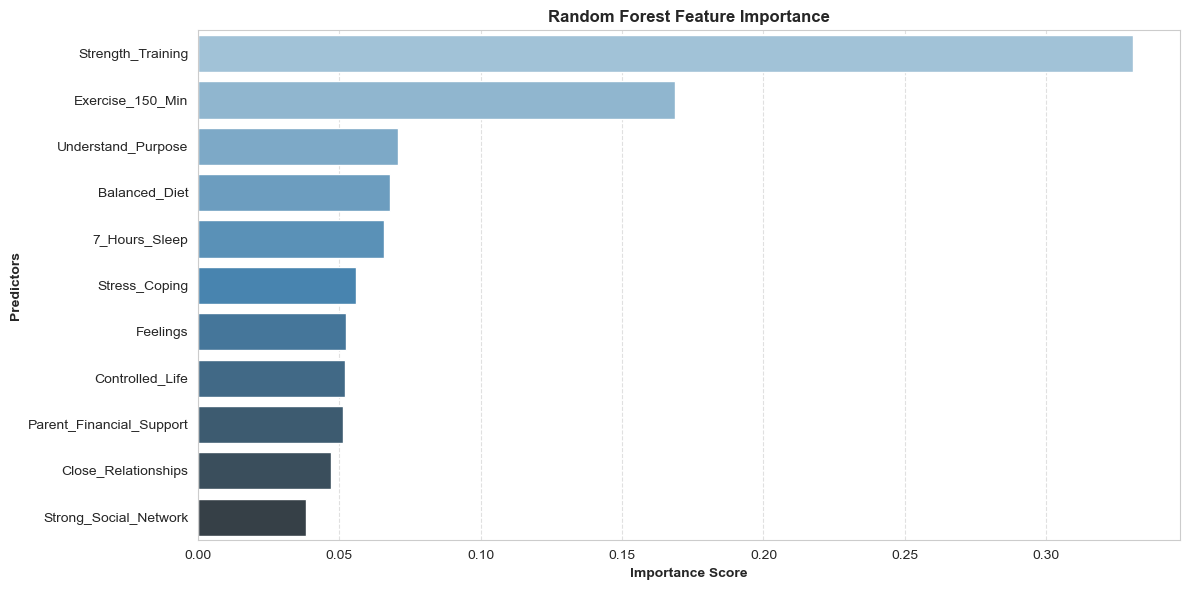

In [129]:
# Random Forest Variable Importance plot for Physical_Activity_Stress

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', 
            data=importance.head(15),
            palette="Blues_d")  # Added matching palette
plt.title("Random Forest Feature Importance", fontweight='bold')
plt.xlabel("Importance Score", fontweight='bold')
plt.ylabel("Predictors", fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Added subtle grid
plt.tight_layout()
plt.show()

C:\Users\wolzi\AppData\Local\Temp\ipykernel_27644\3746566138.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Club_Sports', y='Physical_Activity_Stress', data=data, palette='Blues_d')


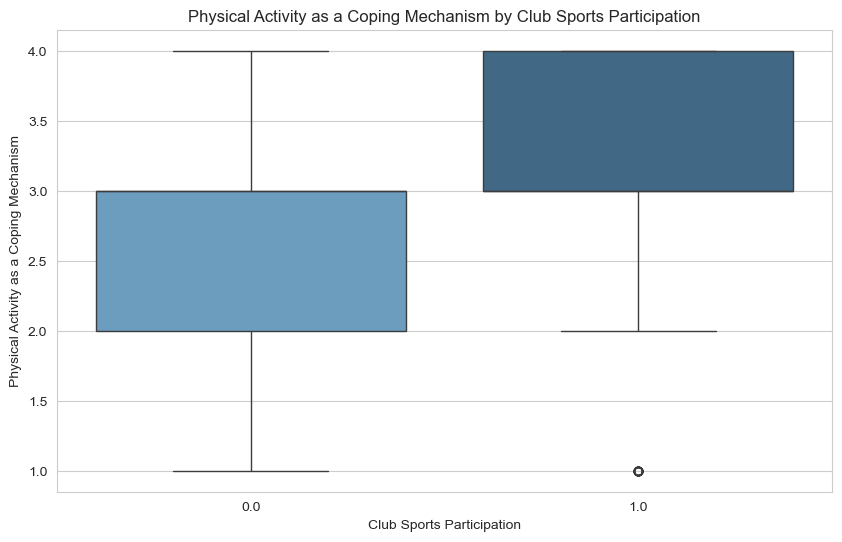

In [81]:
# BOXPLOT -- Participating in Club Sports vs Physical_Activity_Stress

plt.figure(figsize=(10, 6))
sns.boxplot(x='Club_Sports', y='Physical_Activity_Stress', data=data, palette='Blues_d')
plt.title('Physical Activity as a Coping Mechanism by Club Sports Participation')
plt.xlabel('Club Sports Participation')
plt.ylabel('Physical Activity as a Coping Mechanism')
plt.show()

# Shows that students participating in club sports tend to report higher use of physical activity for stress-coping

C:\Users\wolzi\AppData\Local\Temp\ipykernel_27644\4010778814.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exercise_150_Min', y='Physical_Activity_Stress', data=data, palette = "Blues_d")


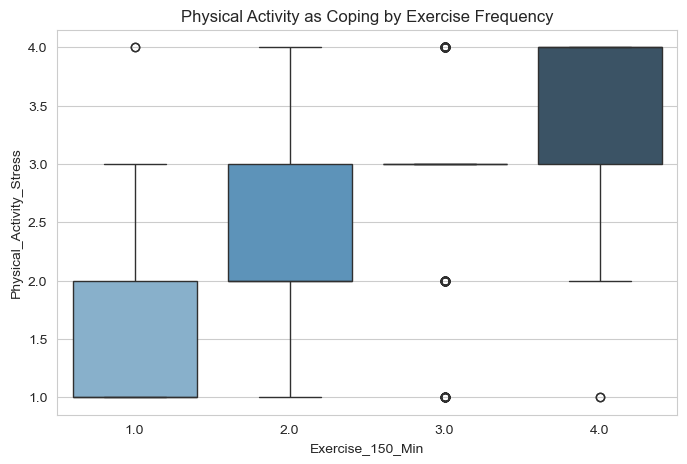

In [83]:
# BOXPLOT -- Exercise_150_Min vs Physical_Activity_Stress (Frequency)

plt.figure(figsize=(8, 5))
sns.boxplot(x='Exercise_150_Min', y='Physical_Activity_Stress', data=data, palette = "Blues_d")
plt.title("Physical Activity as Coping by Exercise Frequency")
plt.show()

# Clear positive relationship - those meeting exercise guidelines (150+ mins) show: (1) Higher median coping scores, less variability, and fewer outliers

C:\Users\wolzi\AppData\Local\Temp\ipykernel_27644\1194417276.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Strength_Training', y='Physical_Activity_Stress', data=data, palette = "Blues_d")


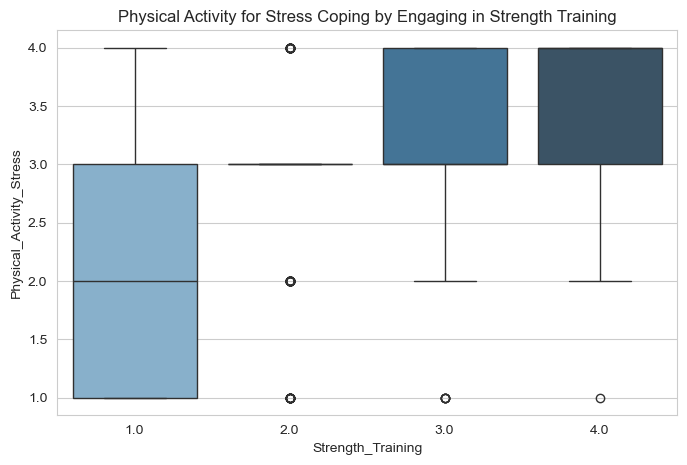

In [133]:
# BOXPLOT -- Strength_Training vs Physical_Activity_Stress

plt.figure(figsize=(8, 5))
sns.boxplot(x='Strength_Training', y='Physical_Activity_Stress', data=data, palette = "Blues_d")
plt.title("Physical Activity for Stress Coping by Engaging in Strength Training")
plt.show()

# Similar to Exercise_150_Min, but there are stronger results on 3-4, rather than before just having strong results on 4. 

In [46]:
# ---------- POSTER IMAGES? ----------

C:\Users\wolzi\AppData\Local\Temp\ipykernel_27644\1565506224.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impacts, y=predictors_ranked, palette="Blues_d", ax=ax)


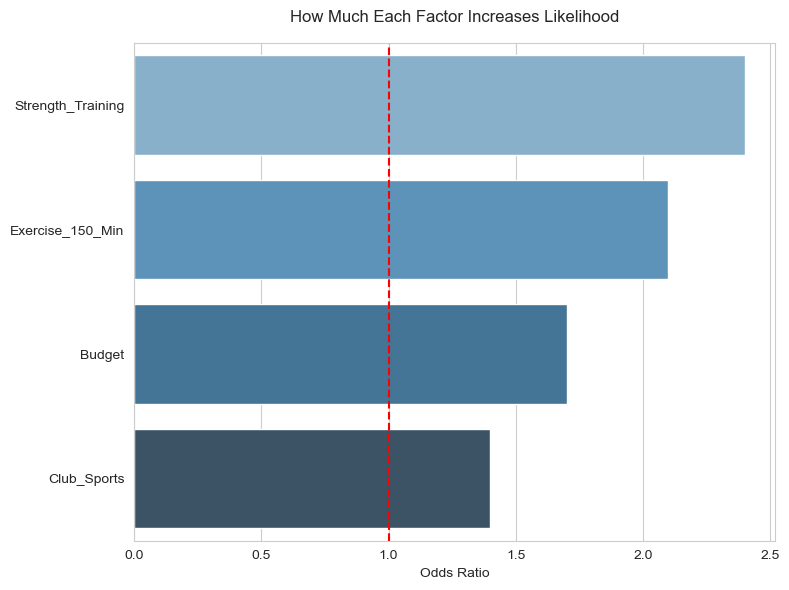

In [89]:
# Create impact pyramid
fig, ax = plt.subplots(figsize=(8,6))
predictors_ranked = ['Strength_Training','Exercise_150_Min','Budget','Club_Sports']
impacts = [2.4, 2.1, 1.7, 1.4] # Odds ratios

sns.barplot(x=impacts, y=predictors_ranked, palette="Blues_d", ax=ax)
ax.set_title("How Much Each Factor Increases Likelihood", pad=15)
ax.set_xlabel("Odds Ratio")
ax.axvline(1, color='red', linestyle='--')
ax.set_ylabel("")
plt.tight_layout()

Text(0.5, 1.0, 'Comparing Predictor Types')

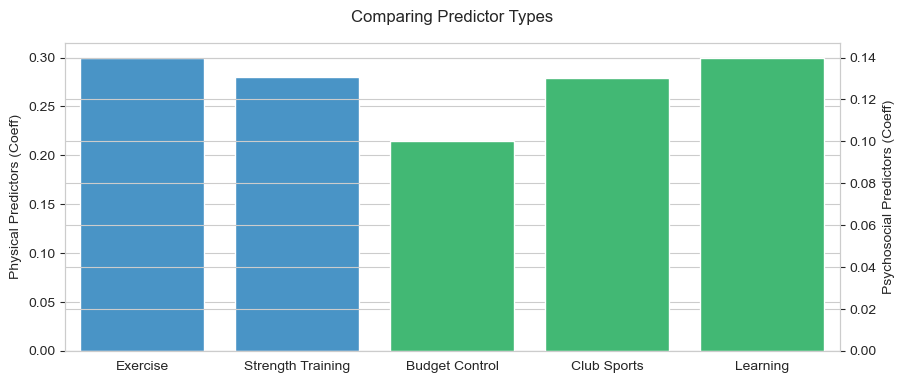

In [48]:
# Behavioral vs psychosocial comparison
fig, ax1 = plt.subplots(figsize=(10,4))

# Physical predictors
sns.barplot(x=['Exercise','Strength Training'], 
            y=[0.30, 0.28], 
            color='#3498db', ax=ax1)

# Psychosocial predictors
ax2 = ax1.twinx()
sns.barplot(x=['Budget Control','Club Sports','Learning'], 
            y=[0.10, 0.13, 0.14], 
            color='#2ecc71', ax=ax2)

ax1.set_ylabel("Physical Predictors (Coeff)")
ax2.set_ylabel("Psychosocial Predictors (Coeff)")
ax1.set_title("Comparing Predictor Types", pad=15)

C:\Users\wolzi\AppData\Local\Temp\ipykernel_27644\2239470013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Strength_Training', y='Physical_Activity_Stress',


Text(0, 0.5, 'Uses Physical Activity for Stress Coping')

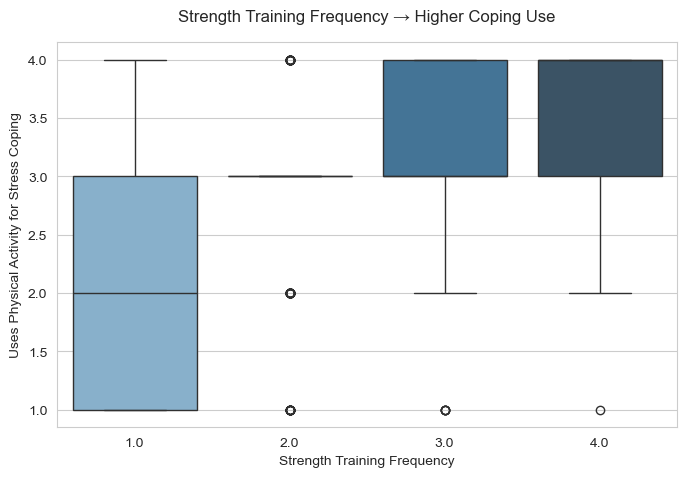

In [105]:
# Best boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x='Strength_Training', y='Physical_Activity_Stress', 
            data=data, palette='Blues_d')
plt.title("Strength Training Frequency → Higher Coping Use", pad=15)
plt.xlabel("Strength Training Frequency")
plt.ylabel("Uses Physical Activity for Stress Coping")

C:\Users\wolzi\AppData\Local\Temp\ipykernel_27644\3533868146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Learn_New_Things', y='Physical_Activity_Stress',


Text(0, 0.5, 'Uses Physical Activity for Stress Coping')

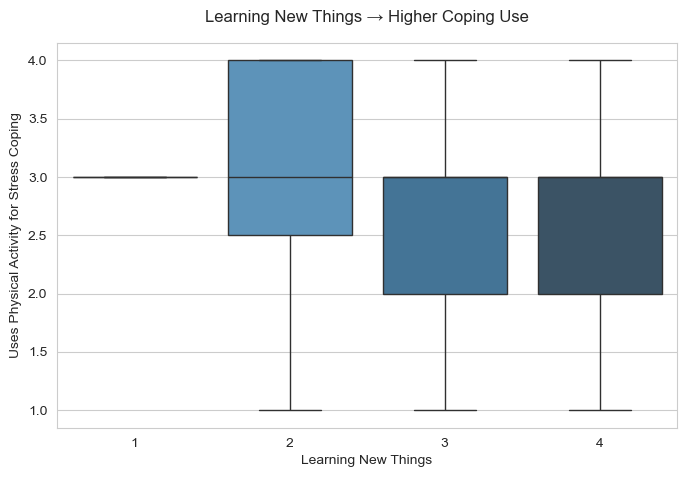

In [107]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Learn_New_Things', y='Physical_Activity_Stress', 
            data=data, palette='Blues_d')
plt.title("Learning New Things → Higher Coping Use", pad=15)
plt.xlabel("Learning New Things")
plt.ylabel("Uses Physical Activity for Stress Coping")

C:\Users\wolzi\AppData\Local\Temp\ipykernel_27644\2833405267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Social_Sorority/Fraternity', y='Physical_Activity_Stress',


Text(0, 0.5, 'Uses Physical Activity for Stress Coping')

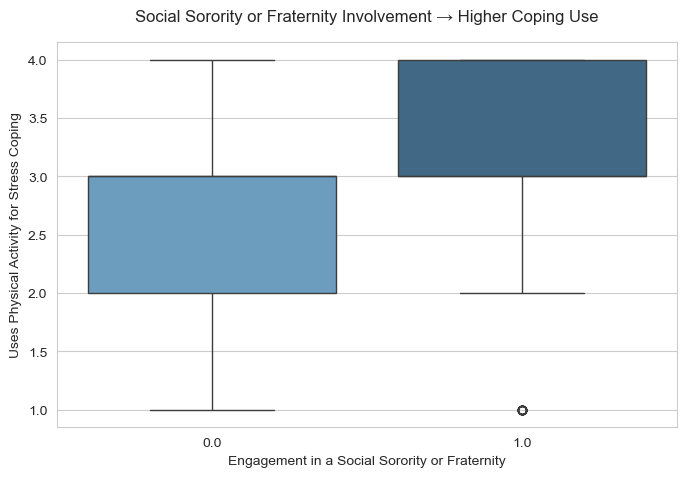

In [135]:
# GOOD
plt.figure(figsize=(8,5))
sns.boxplot(x='Social_Sorority/Fraternity', y='Physical_Activity_Stress', 
            data=data, palette='Blues_d')
plt.title("Social Sorority or Fraternity Involvement → Higher Coping Use", pad=15)
plt.xlabel("Engagement in a Social Sorority or Fraternity")
plt.ylabel("Uses Physical Activity for Stress Coping")